<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/main/Candy_IntegerProgramming_searchspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
With Continous Variables

                   Adjusted Balanced Accuracy
chocolate                           0.972973
fruity                              0.973684
caramel                             0.129779
peanutyalmondy                      0.143863
nougat                              0.558608
crispedricewafer                    0.272894
hard                                0.085714
bar                                 0.889881
pluribus                            0.512195
other                               1.000000


                  Adjusted Balanced Accuracy
chocolate                           0.972973
fruity                              0.973684
caramel                             0.188129
peanutyalmondy                      0.373239
nougat                              0.688645
crispedricewafer                    0.390110
hard                                0.190476
bar                                 0.889881
pluribus                            0.489468
other                               1.000000



peanutyalmondy       0.143863 - 0.373239 = 0.229376
nougat               0.558608 - 0.688645 = 0.13
crispedricewafer     0.272894 - 0.390110 = 0.1172
hard                 0.085714 - 0.190476 = 0.104
caramel              0.129779 - 0.188129 = 0.05835



peanutyalmondy
nougat
crispedricewafer
hard
caramel

pluribus
bar
'''

In [26]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/ate_df_xyz123.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,winpercent,pricepercent,sugarpercent,treatments
0,0,0.187205,0.290580,0.058453,chocolate
1,1,0.087560,0.198220,0.200239,caramel
2,2,0.171796,0.232638,0.082415,peanutyalmondy
3,3,0.110732,0.151184,0.127181,nougat
4,4,0.184654,0.352849,0.031096,crispedricewafer
5,5,-0.124270,-0.174848,0.083500,hard
6,6,-0.067629,-0.128992,0.024898,pluribus
7,7,-0.112572,-0.244271,-0.012242,fruity
8,8,-0.161970,-0.124387,-0.088911,other_candy


In [27]:

# Remove the specified columns: fruity, other, pluribus
columns_to_drop = ['fruity', 'other_candy', 'pluribus']
columns_to_drop = [""]
c          = df ["treatments"].isin (columns_to_drop)
df         = df [~c]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the cleaned DataFrame
df_cleaned


,Unnamed: 0,winpercent,pricepercent,sugarpercent,treatments
0,0,0.187205,0.290580,0.058453,chocolate
1,1,0.087560,0.198220,0.200239,caramel
2,2,0.171796,0.232638,0.082415,peanutyalmondy
3,3,0.110732,0.151184,0.127181,nougat
4,4,0.184654,0.352849,0.031096,crispedricewafer
5,5,-0.124270,-0.174848,0.083500,hard
6,6,-0.067629,-0.128992,0.024898,pluribus
7,7,-0.112572,-0.244271,-0.012242,fruity
8,8,-0.161970,-0.124387,-0.088911,other_candy


In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'treatments' column to numeric values
label_encoder = LabelEncoder()
df_cleaned['treatments_encoded'] = label_encoder.fit_transform(df_cleaned['treatments'])

# Extract the encoded values
encoded_values = df_cleaned['treatments_encoded'].unique()

# Create a mapping from treatments to encoded integers
treatment_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}

# Generate the search space: one-hot encoded representation
search_space = pd.get_dummies(df_cleaned['treatments_encoded'])

# Add the treatment labels for clarity
search_space.columns = label_encoder.inverse_transform(search_space.columns)

# Display the search space
search_space


,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus
0,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False


In [29]:
search_space.shape

(9, 9)

In [30]:
import itertools

# Get the list of unique treatments
unique_treatments = label_encoder.classes_
n_treatments = len(unique_treatments)

# Generate all possible binary combinations for treatments
binary_combinations = list(itertools.product([0, 1], repeat=n_treatments))

# Create a DataFrame from the binary combinations
binary_search_space = pd.DataFrame(binary_combinations, columns=unique_treatments)

# Display the first few rows of the binary search space
binary_search_space


,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,0,1,1
508,1,1,1,1,1,1,1,0,0
509,1,1,1,1,1,1,1,0,1
510,1,1,1,1,1,1,1,1,0


In [31]:
binary_search_space.shape

(512, 9)

In [32]:
# Adjust filter function to consider only treatment columns
def filter_rows_encoded(df, combination, label_encoder):
    mask = True
    for treatment, value in combination.items():
        if treatment in label_encoder.classes_:
            encoded_treatment = label_encoder.transform([treatment])[0]
            mask &= (df['treatments_encoded'] == encoded_treatment) == value
    return df[mask]

# Adjust computation to compute aggregate values
for index, combination in binary_search_space.iterrows():
    subset_df = filter_rows_encoded(df_cleaned, combination, label_encoder)

    binary_search_space.loc[index, 'winpercent'] = subset_df['winpercent'].mean() if not subset_df.empty else 0
    binary_search_space.loc[index, 'pricepercent'] = subset_df['pricepercent'].mean() if not subset_df.empty else 0
    binary_search_space.loc[index, 'sugarpercent'] = subset_df['sugarpercent'].mean() if not subset_df.empty else 0

# Display the updated search space with aggregate values
binary_search_space.head()


,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus,winpercent,pricepercent,sugarpercent
0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,1,-0.067629,-0.128992,0.024898
2,0,0,0,0,0,0,0,1,0,0.171796,0.232638,0.082415
3,0,0,0,0,0,0,0,1,1,0.000000,0.000000,0.000000
4,0,0,0,0,0,0,1,0,0,-0.161970,-0.124387,-0.088911


In [39]:
# Adjusted computation to multiply binary decisions by respective parameters

# Create dictionaries to hold aggregate values for each treatment
winpercent_dict = df_cleaned.groupby('treatments_encoded')['winpercent'].mean().to_dict()
pricepercent_dict = df_cleaned.groupby('treatments_encoded')['pricepercent'].mean().to_dict()
sugarpercent_dict = df_cleaned.groupby('treatments_encoded')['sugarpercent'].mean().to_dict()

# Recalculate aggregate values
for index, combination in binary_search_space.iterrows():
    winpercent_sum = 0
    pricepercent_sum = 0
    sugarpercent_sum = 0

    for treatment, value in combination.items():
        if treatment in label_encoder.classes_ and value == 1:
            encoded_treatment = label_encoder.transform([treatment])[0]
            winpercent_sum += winpercent_dict.get(encoded_treatment, 0)
            pricepercent_sum += pricepercent_dict.get(encoded_treatment, 0)
            sugarpercent_sum += sugarpercent_dict.get(encoded_treatment, 0)

    binary_search_space.loc[index, 'winpercent'] = winpercent_sum
    binary_search_space.loc[index, 'pricepercent'] = pricepercent_sum
    binary_search_space.loc[index, 'sugarpercent'] = sugarpercent_sum

# Display the updated search space with corrected aggregate values
binary_search_space.head()


,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus,winpercent,pricepercent,sugarpercent
0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,1,-0.067629,-0.128992,0.024898
2,0,0,0,0,0,0,0,1,0,0.171796,0.232638,0.082415
3,0,0,0,0,0,0,0,1,1,0.104167,0.103645,0.107313
4,0,0,0,0,0,0,1,0,0,-0.161970,-0.124387,-0.088911


In [40]:
effective_search_space_c1 = binary_search_space ["winpercent"]   == 0
effective_search_space_c2 = binary_search_space ["sugarpercent"] == 0
effective_search_space_c3 = binary_search_space ["pricepercent"] == 0
effective_search_space_c  = effective_search_space_c1 & effective_search_space_c2 & effective_search_space_c3
effective_search_space    = binary_search_space [~effective_search_space_c ]
effective_search_space

,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus,winpercent,pricepercent,sugarpercent
1,0,0,0,0,0,0,0,0,1,-0.067629,-0.128992,0.024898
2,0,0,0,0,0,0,0,1,0,0.171796,0.232638,0.082415
3,0,0,0,0,0,0,0,1,1,0.104167,0.103645,0.107313
4,0,0,0,0,0,0,1,0,0,-0.161970,-0.124387,-0.088911
5,0,0,0,0,0,0,1,0,1,-0.229599,-0.253379,-0.064014
...,...,...,...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,0,1,1,0.437476,0.677359,0.595540
508,1,1,1,1,1,1,1,0,0,0.171339,0.449327,0.399316
509,1,1,1,1,1,1,1,0,1,0.103710,0.320334,0.424213
510,1,1,1,1,1,1,1,1,0,0.343135,0.681965,0.481731


In [52]:
effective_search_space.sort_values ("pricepercent")

,caramel,chocolate,crispedricewafer,fruity,hard,nougat,other_candy,peanutyalmondy,pluribus,winpercent,pricepercent,sugarpercent
53,0,0,0,1,1,0,1,0,1,-0.466441,-0.672499,0.007244
49,0,0,0,1,1,0,0,0,1,-0.304471,-0.548112,0.096155
52,0,0,0,1,1,0,1,0,0,-0.398812,-0.543506,-0.017654
61,0,0,0,1,1,1,1,0,1,-0.355709,-0.521315,0.134425
37,0,0,0,1,0,0,1,0,1,-0.342171,-0.497650,-0.076256
...,...,...,...,...,...,...,...,...,...,...,...,...
474,1,1,1,0,1,1,0,1,0,0.617676,1.050623,0.582884
450,1,1,1,0,0,0,0,1,0,0.631215,1.074287,0.372204
459,1,1,1,0,0,1,0,1,1,0.674318,1.096479,0.524282
462,1,1,1,0,0,1,1,1,0,0.579977,1.101084,0.410473


In [41]:
effective_search_space.shape

(511, 12)

<Axes: >

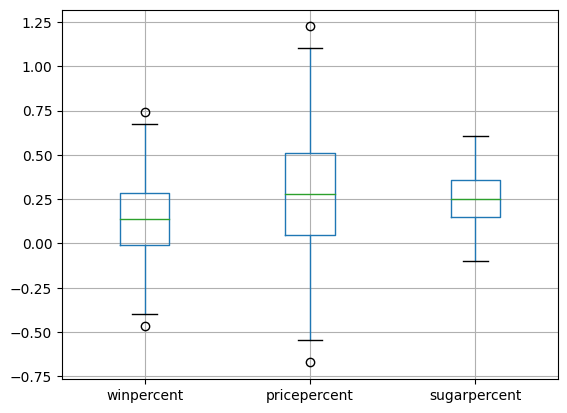

In [50]:
effective_search_space.iloc [:,-3:].boxplot()

In [43]:
effective_search_space.to_csv ("effective_search_space_xyz123.csv",index= False)

In [45]:
effective_search_space.columns

Index(['caramel', 'chocolate', 'crispedricewafer', 'fruity', 'hard', 'nougat',
       'other_candy', 'peanutyalmondy', 'pluribus', 'winpercent',
       'pricepercent', 'sugarpercent'],
      dtype='object')

In [59]:
from scipy.optimize import linprog
import numpy as np

candy_data = effective_search_space.copy (deep = True)

# Extract the decision variables
num_candies = len(candy_data)
decision_vars = ['caramel', 'chocolate', 'crispedricewafer', 'fruity', 'hard', 'nougat',
       'other_candy', 'peanutyalmondy', 'pluribus']

# Objective function coefficients (negated to convert to minimization problem)
objective = -candy_data['winpercent'].to_numpy()

# Constraints coefficients for sugarpercent and pricepercent and number of candies
A = np.vstack([candy_data['sugarpercent'], candy_data['pricepercent'] , np.ones(num_candies)])
b = np.array([0.25, 0.25 , 5])

# Bounds for each variable (binary: 0 or 1)
bounds = [(0, 1) for _ in range(num_candies)]

# Solve the linear programming problem
result = linprog(objective, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Extract the optimal candy selection
optimal_candies = [candy_data.iloc[i] for i in range(num_candies) if result.x[i] > 0]

optimal_candies, -result.fun


([caramel             0.000000
  chocolate           0.000000
  crispedricewafer    0.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_candy         0.000000
  peanutyalmondy      0.000000
  pluribus            0.000000
  winpercent         -0.112572
  pricepercent       -0.244271
  sugarpercent       -0.012242
  Name: 32, dtype: float64,
  caramel             0.000000
  chocolate           0.000000
  crispedricewafer    0.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_candy         0.000000
  peanutyalmondy      1.000000
  pluribus            0.000000
  winpercent          0.059224
  pricepercent       -0.011634
  sugarpercent        0.070173
  Name: 34, dtype: float64,
  caramel             0.000000
  chocolate           0.000000
  crispedricewafer    1.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_candy 

In [ ]:
result.x

In [66]:
#pip install scipy>=1.10

In [93]:
from scipy.optimize import linprog
from scipy.optimize import milp
import numpy as np
from scipy.optimize import milp, LinearConstraint , Bounds

candy_data = effective_search_space.copy (deep = True)

# Extract the decision variables
num_candies = len(candy_data)
decision_vars = ['caramel', 'chocolate', 'crispedricewafer', 'fruity', 'hard', 'nougat',
       'other_candy', 'peanutyalmondy', 'pluribus']

# Objective function coefficients (negated to convert to minimization problem)
objective = -candy_data['winpercent'].to_numpy()

# Constraints coefficients for sugarpercent and pricepercent and number of candies
A = np.vstack([candy_data['sugarpercent'], candy_data['pricepercent'] , np.ones(num_candies)])
b = np.array([0.25, 0.25 ,3])

# Bounds for each variable (binary: 0 or 1)
bounds = [(0, 1) for _ in range(num_candies)]

integrality = [1] * len(candy_data)

bounds = Bounds([0] * len(candy_data), [1] * len(candy_data))

linear_constraints = LinearConstraint (A, lb=[0,0,0], ub=b)

# Solve the linear programming problem
result = milp (objective, constraints = [linear_constraints], integrality = integrality , bounds = bounds)

# Extract the optimal candy selection
optimal_candies = [candy_data.iloc[i] for i in range(num_candies) if result.x[i] > 0]

optimal_candies, -result.fun

([caramel             0.000000
  chocolate           1.000000
  crispedricewafer    0.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_candy         0.000000
  peanutyalmondy      0.000000
  pluribus            0.000000
  winpercent          0.074633
  pricepercent        0.046309
  sugarpercent        0.046211
  Name: 160, dtype: float64,
  caramel             0.000000
  chocolate           1.000000
  crispedricewafer    0.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_candy         0.000000
  peanutyalmondy      0.000000
  pluribus            1.000000
  winpercent          0.007005
  pricepercent       -0.082684
  sugarpercent        0.071109
  Name: 161, dtype: float64,
  caramel             0.000000
  chocolate           1.000000
  crispedricewafer    0.000000
  fruity              1.000000
  hard                0.000000
  nougat              0.000000
  other_cand

In [85]:
0.246429 + 0.007005 + 0.074633

0.328067

In [84]:
result.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [94]:
sugarpercent_list = []
pricepercent_list = []
winpercent_list   = []
num_candies_limit = 5
for i in range (1,50):
  for j in range (1,50):

    b = np.array([i/10, j/10 , num_candies_limit])
    sugarpercent_list.append (i/10)
    pricepercent_list.append (j/10)


    # Bounds for each variable (binary: 0 or 1)
    bounds = [(0, 1) for _ in range(num_candies)]

    integrality = [1] * len(candy_data)

    bounds = Bounds([0] * len(candy_data), [1] * len(candy_data))

    linear_constraints = LinearConstraint (A, lb=[0,0,0], ub=b)

    # Solve the linear programming problem
    result = milp (objective, constraints = [linear_constraints], integrality = integrality , bounds = bounds)

    winpercent_list .append (-result.fun)

    print (i/10,j/10,-result.fun)


0.1 0.1 0.14926692038683237
0.1 0.2 0.14926692038683262
0.1 0.3 0.21879823266170104
0.1 0.4 0.2592874220994968
0.1 0.5 0.3186663899040886
0.1 0.6 0.3313698083336392
0.1 0.7 0.371858997771435
0.1 0.8 0.42868689161675244
0.1 0.9 0.4564726626249973
0.1 1.0 0.5105946003362836
0.1 1.1 0.5412584672886908
0.1 1.2 0.5817476567264865
0.1 1.3 0.6079116836193942
0.1 1.4 0.651278969001355
0.1 1.5 0.6914411364542611
0.1 1.6 0.7511471262437535
0.1 1.7 0.7916363156815412
0.1 1.8 0.8014616381670379
0.1 1.9 0.8611676279564064
0.1 2.0 0.8889533989646518
0.1 2.1 0.9610357851987942
0.1 2.2 0.9708611076841858
0.1 2.3 0.9835645261137427
0.1 2.4 1.0113502971219757
0.1 2.5 1.0113502971219757
0.1 2.6 1.0113502971219757
0.1 2.7 1.0113502971219757
0.1 2.8 1.0113502971219757
0.1 2.9 1.0113502971219757
0.1 3.0 1.0113502971219757
0.1 3.1 1.0113502971219757
0.1 3.2 1.0113502971219757
0.1 3.3 1.0113502971219757
0.1 3.4 1.0113502971219757
0.1 3.5 1.0113502971219757
0.1 3.6 1.0113502971219757
0.1 3.7 1.0113502971219757

In [95]:
sim_dict = {
    "sugarpercent_sim"  : sugarpercent_list ,
    "pricepercent_sim"  : pricepercent_list ,
    "winpercent_sim"    : winpercent_list

}

sim_df = pd.DataFrame (sim_dict)
sim_df


,sugarpercent_sim,pricepercent_sim,winpercent_sim
0,0.1,0.1,0.149267
1,0.1,0.2,0.149267
2,0.1,0.3,0.218798
3,0.1,0.4,0.259287
4,0.1,0.5,0.318666
...,...,...,...
2396,4.9,4.5,2.949070
2397,4.9,4.6,2.999093
2398,4.9,4.7,3.041710
2399,4.9,4.8,3.086653


In [96]:
sim_df ["price_sugar_sim"] = sim_df ["pricepercent_sim"] * sim_df["sugarpercent_sim"]

<Axes: xlabel='winpercent_sim', ylabel='price_sugar_sim'>

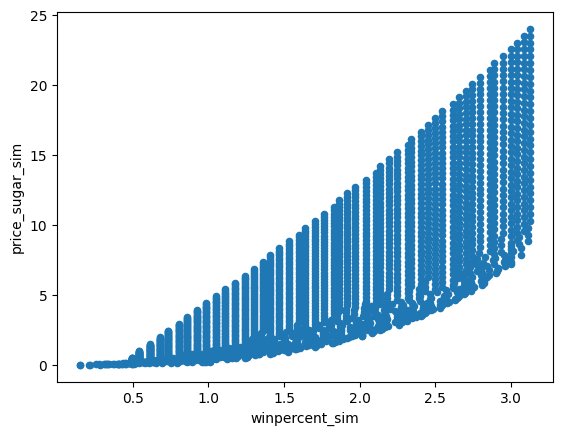

In [97]:
sim_df.plot.scatter (  "winpercent_sim"  , "price_sugar_sim" )

In [98]:
#sim_df.to_csv ("sim_df_xyz123.csv")

In [108]:
c1 = sim_df ["winpercent_sim"] <= 1.5
c2 = sim_df ["winpercent_sim"] >= 1
c3 = sim_df ["price_sugar_sim"] < 5
c4 = sim_df ["sugarpercent_sim"] <= 2
c5 = sim_df ["pricepercent_sim"] <= 2
c  = c1 & c2 &c3 & c4 & c5
sim_df [c].sort_values ("winpercent_sim")

,sugarpercent_sim,pricepercent_sim,winpercent_sim,price_sugar_sim
114,0.3,1.7,1.003005,0.51
401,0.9,1.0,1.011571,0.90
304,0.7,1.1,1.013410,0.77
256,0.6,1.2,1.015250,0.72
450,1.0,1.0,1.017864,1.00
...,...,...,...,...
947,2.0,1.7,1.469636,3.40
555,1.2,1.7,1.469636,2.04
702,1.5,1.7,1.469636,2.55
361,0.8,1.9,1.472761,1.52
